In [1]:
import sys
sys.path.append('../../src/')

import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import pandas as pd
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
from utils.utils import train_data, plot_results


%matplotlib inline
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
name = "Cutoff = 0.2"
activation = 'relu'
batch_size = 128
neurons_number = 128
epochs = 20
optimize = 'Adam'

In [3]:
# build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(neurons_number, input_shape=(1,), name='input', activation=activation))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dense(1, name='output'))
# summary of the model
model.summary()
model.compile(optimizer=optimize, loss='mean_squared_error', metrics=['mse', 'mean_absolute_error'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               256       
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 1)                 1

In [4]:
X_train, Y_train = train_data(start=0, end=0.2, number=10000)
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

Epoch 1/20
63/63 [==============================] - 0s 4ms/step - loss: 0.0019 - mse: 0.0019 - mean_absolute_error: 0.0299 - val_loss: 2.4315e-05 - val_mse: 2.4315e-05 - val_mean_absolute_error: 0.0048
Epoch 2/20
63/63 [==============================] - 0s 1ms/step - loss: 8.5290e-07 - mse: 8.5290e-07 - mean_absolute_error: 6.3776e-04 - val_loss: 2.4560e-06 - val_mse: 2.4560e-06 - val_mean_absolute_error: 0.0014
Epoch 3/20
63/63 [==============================] - 0s 1ms/step - loss: 2.6389e-08 - mse: 2.6389e-08 - mean_absolute_error: 1.0205e-04 - val_loss: 1.8144e-06 - val_mse: 1.8144e-06 - val_mean_absolute_error: 0.0012
Epoch 4/20
63/63 [==============================] - 0s 1ms/step - loss: 9.5801e-09 - mse: 9.5801e-09 - mean_absolute_error: 5.6676e-05 - val_loss: 1.7125e-06 - val_mse: 1.7125e-06 - val_mean_absolute_error: 0.0011
Epoch 5/20
63/63 [==============================] - 0s 1ms/step - loss: 3.7947e-09 - mse: 3.7947e-09 - mean_absolute_error: 3.5188e-05 - val_loss: 1.5854e-0

In [5]:
X_test, Y_test = train_data(start=0, end=1.0, number=333)
loss, mse, mean_absolute_error = model.evaluate(X_test, Y_test)

11/11 [==============================] - 0s 319us/step - loss: 0.0037 - mse: 0.0037 - mean_absolute_error: 0.0464      


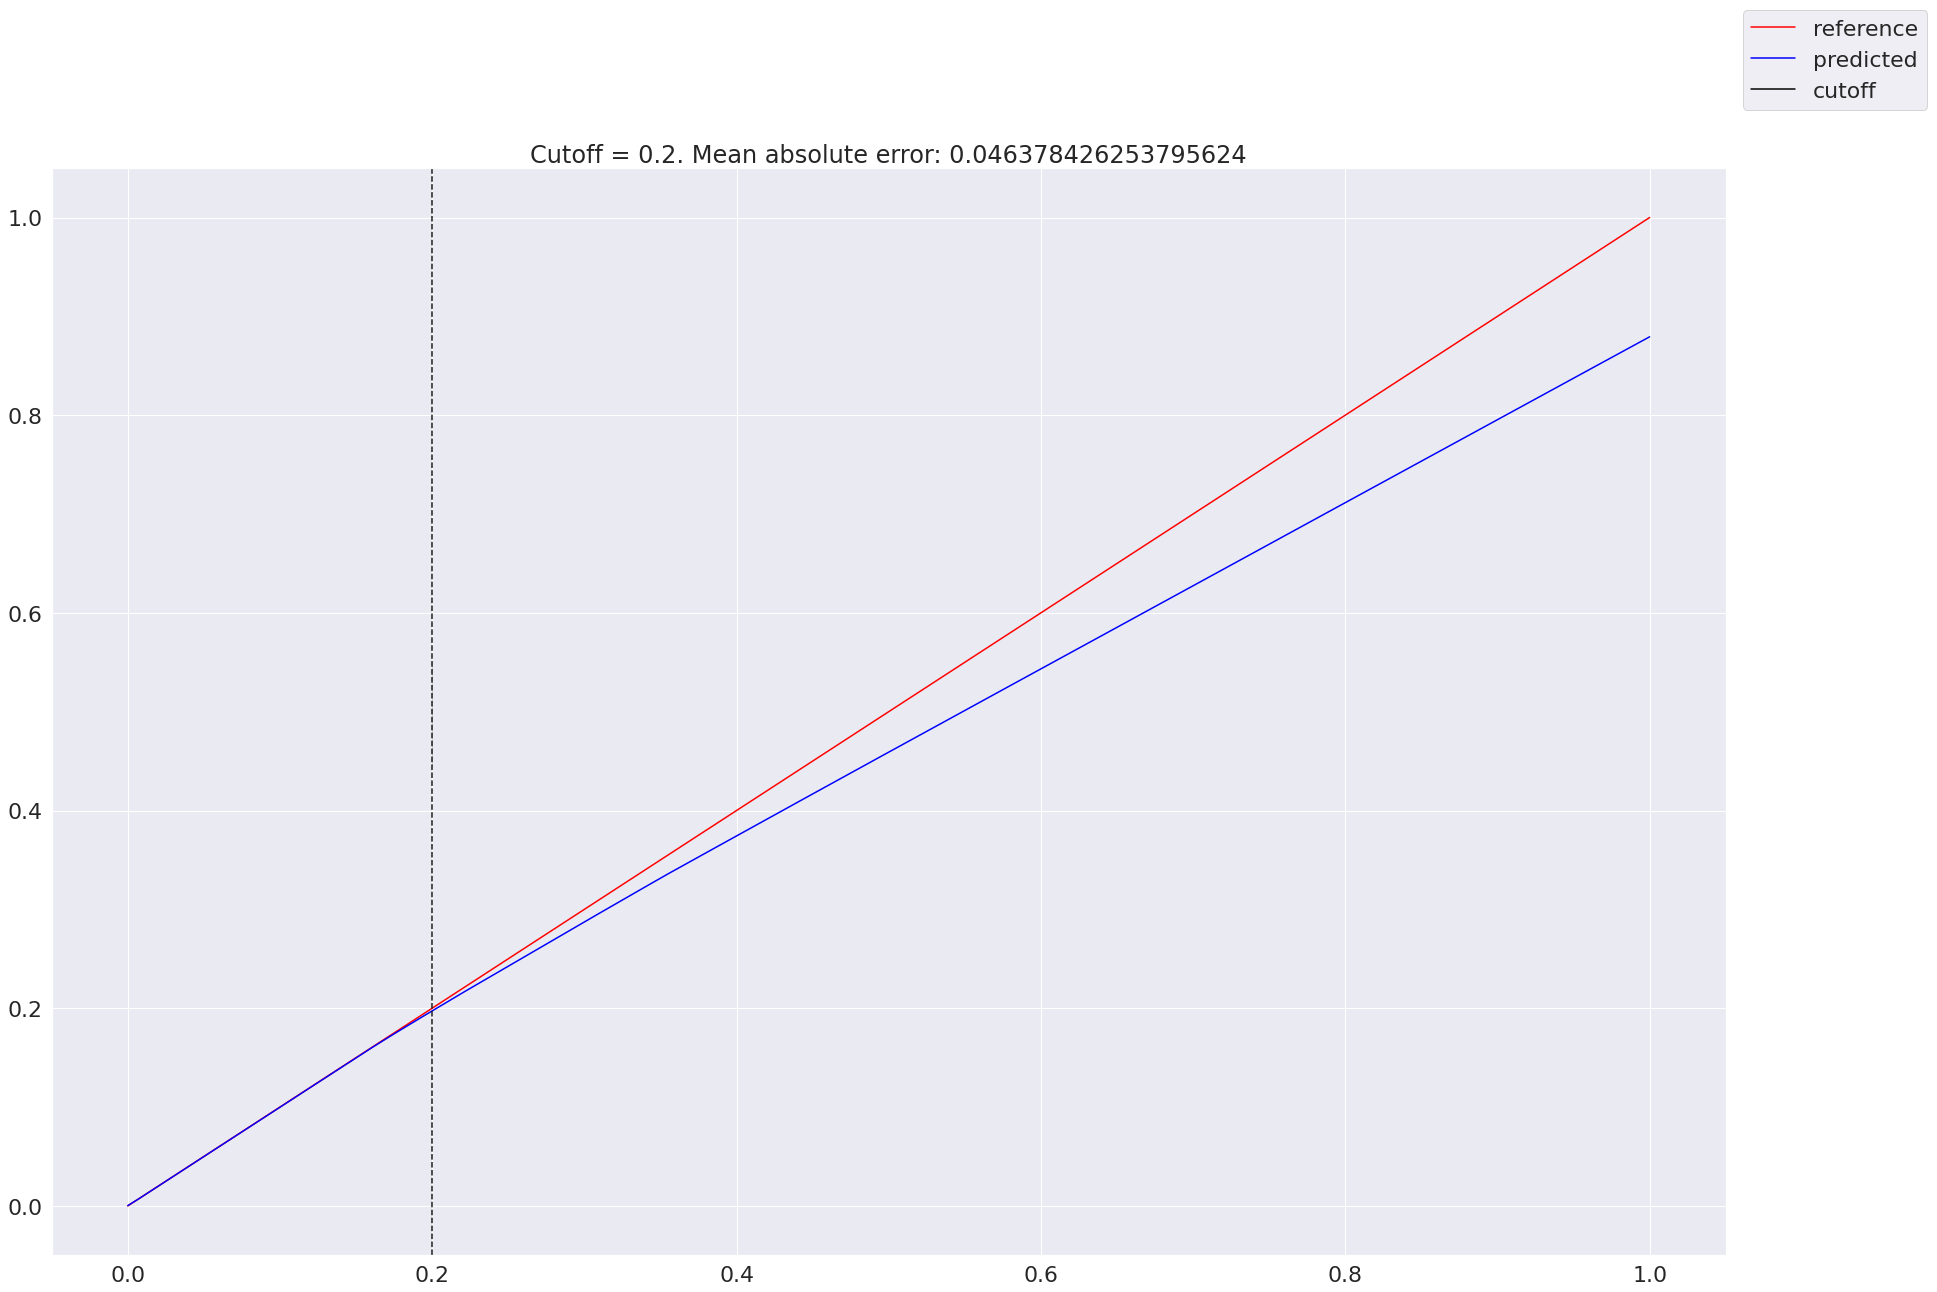

In [6]:
grid = np.linspace(0, 1.0, 150)
predicted = model.predict(grid).reshape((150,))

plot_results(grid, predicted, name, mean_absolute_error, 0.2)